
Earthquake Prediction Model with Machine Learning


Importing Necessary Libraries:
Begin by importing the required libraries for data manipulation, visualization, and machine learning algorithms such as pandas, numpy, matplotlib, scikit-learn, and keras.



In [335]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf


In [336]:
#practicing eda using some inbuilt libraries

In [337]:
data_earthquake=pd.read_csv('database.csv')

In [338]:
data_earthquake.head()

Date       Time    Latitude  Longitude     Type     Depth  Depth Error  \
0  01/02/1965  13:44:18   19.246    145.616   Earthquake  131.6     NaN        
1  01/04/1965  11:29:49    1.863    127.352   Earthquake   80.0     NaN        
2  01/05/1965  18:05:58  -20.579   -173.972   Earthquake   20.0     NaN        
3  01/08/1965  18:49:43  -59.076    -23.557   Earthquake   15.0     NaN        
4  01/09/1965  13:32:50   11.938    126.427   Earthquake   15.0     NaN        

   Depth Seismic Stations  Magnitude Magnitude Type  Magnitude Error  \
0           NaN               6.0          MW             NaN          
1           NaN               5.8          MW             NaN          
2           NaN               6.2          MW             NaN          
3           NaN               5.8          MW             NaN          
4           NaN               5.8          MW             NaN          

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0             NaN                  NaN               NaN            
1             NaN                  NaN               NaN            
2             NaN                  NaN               NaN            
3             NaN                  NaN               NaN            
4             NaN                  NaN               NaN            

   Horizontal Error  Root Mean Square       ID       Source Location Source  \
0        NaN               NaN         ISCGEM860706  ISCGEM      ISCGEM       
1        NaN               NaN         ISCGEM860737  ISCGEM      ISCGEM       
2        NaN               NaN         ISCGEM860762  ISCGEM      ISCGEM       
3        NaN               NaN         ISCGEM860856  ISCGEM      ISCGEM       
4        NaN               NaN         ISCGEM860890  ISCGEM      ISCGEM       

  Magnitude Source   Status    
0      ISCGEM       Automatic  
1      ISCGEM       Automatic  
2      ISCGEM       Automatic  
3      ISCGEM       Automatic  
4      ISCGEM       Automatic

In [339]:
from autoviz.AutoViz_Class import AutoViz_Class

In [340]:

AV=AutoViz_Class()

Shape of your Data Set loaded: (23412, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  2
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  3
    21 Predictors classified...
        4 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['ID', 'Magnitude Error', 'Horizontal Distance', 'Horizontal Error'

Number of All Scatter Plots = 45


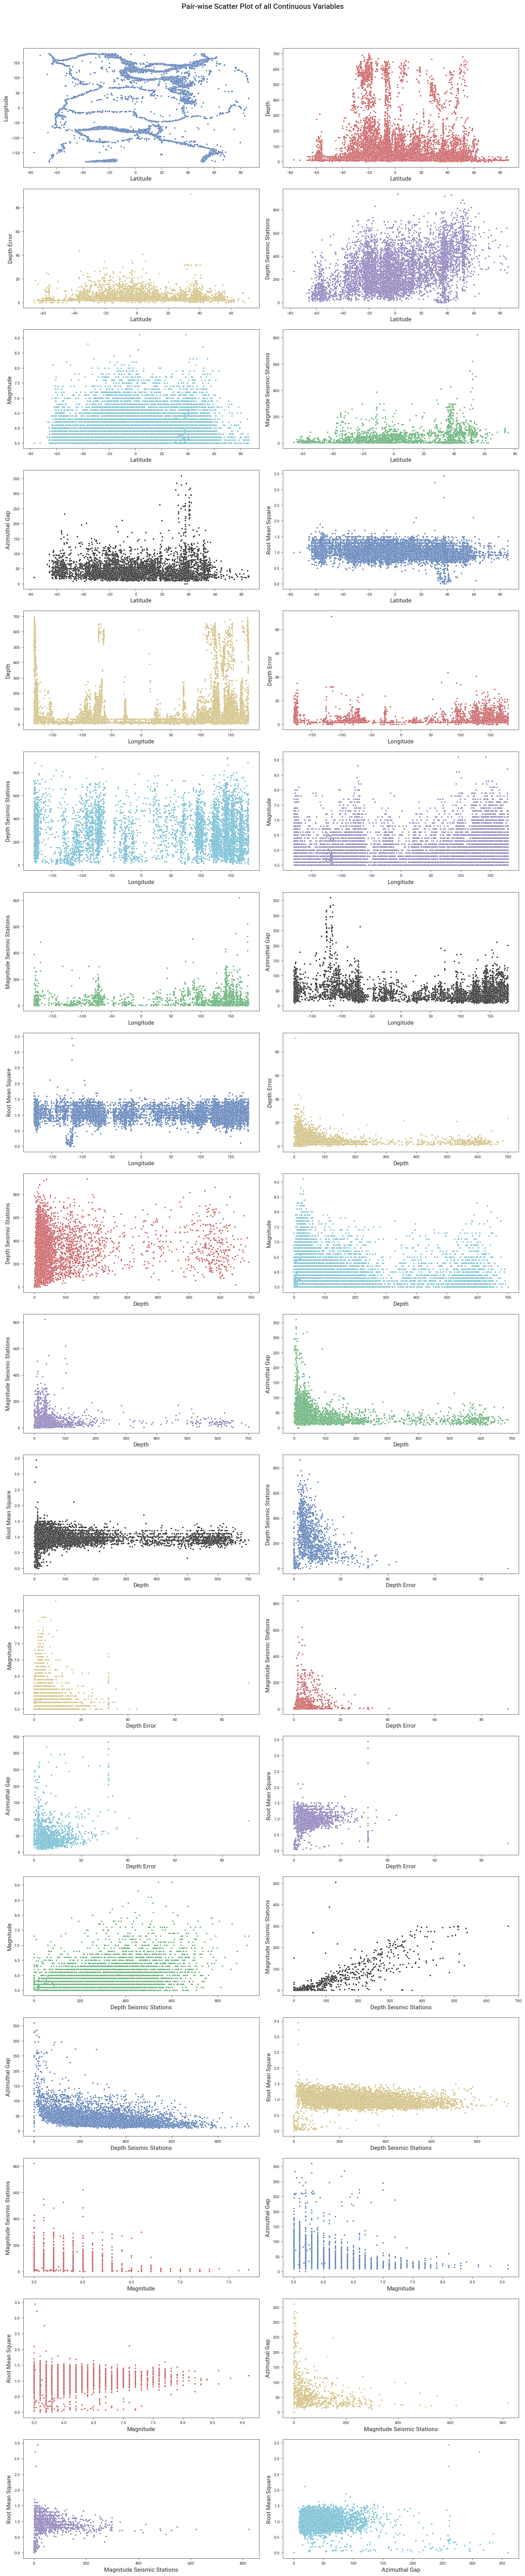

Could not draw Distribution Plot


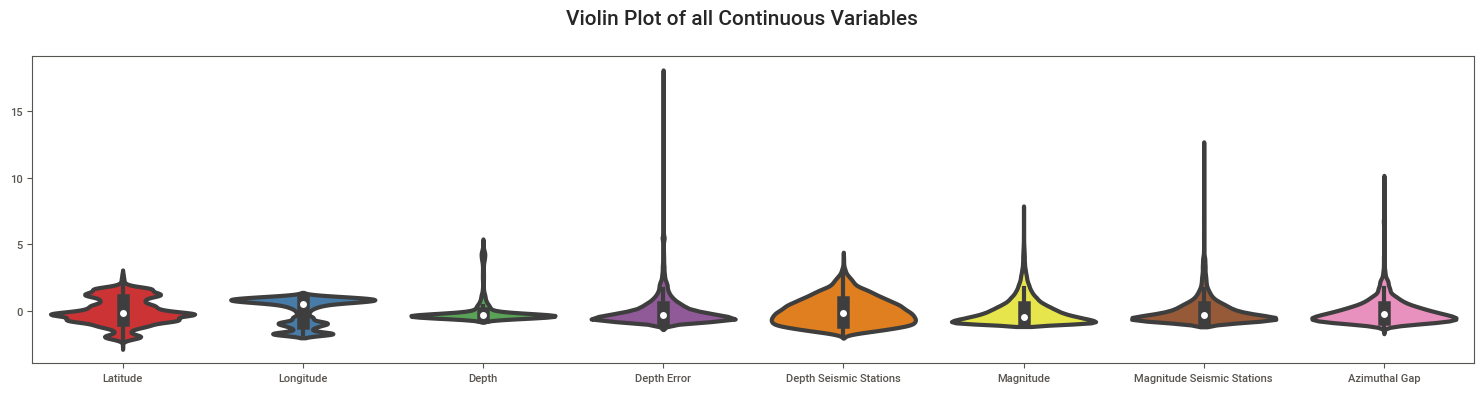

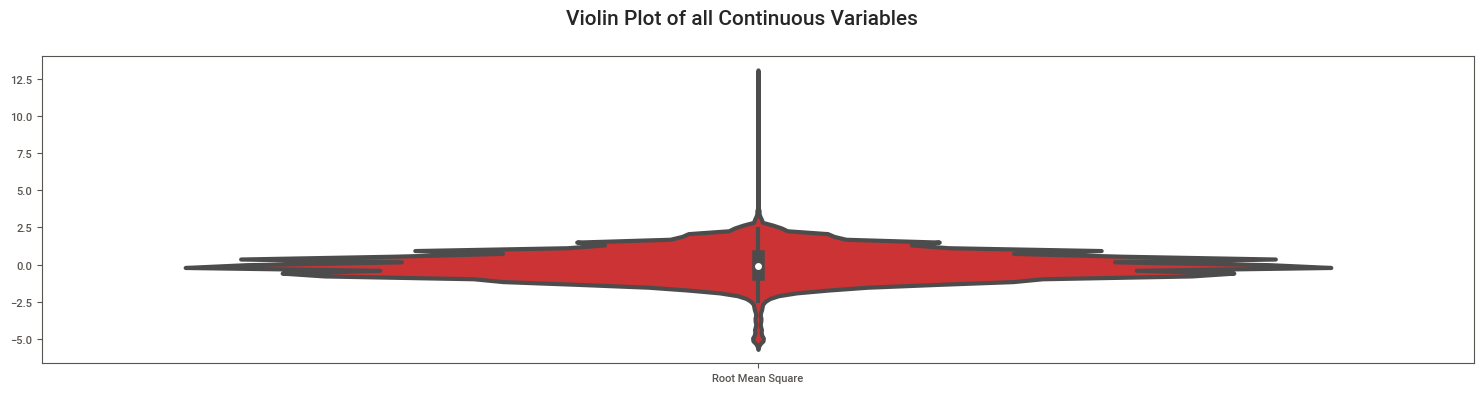

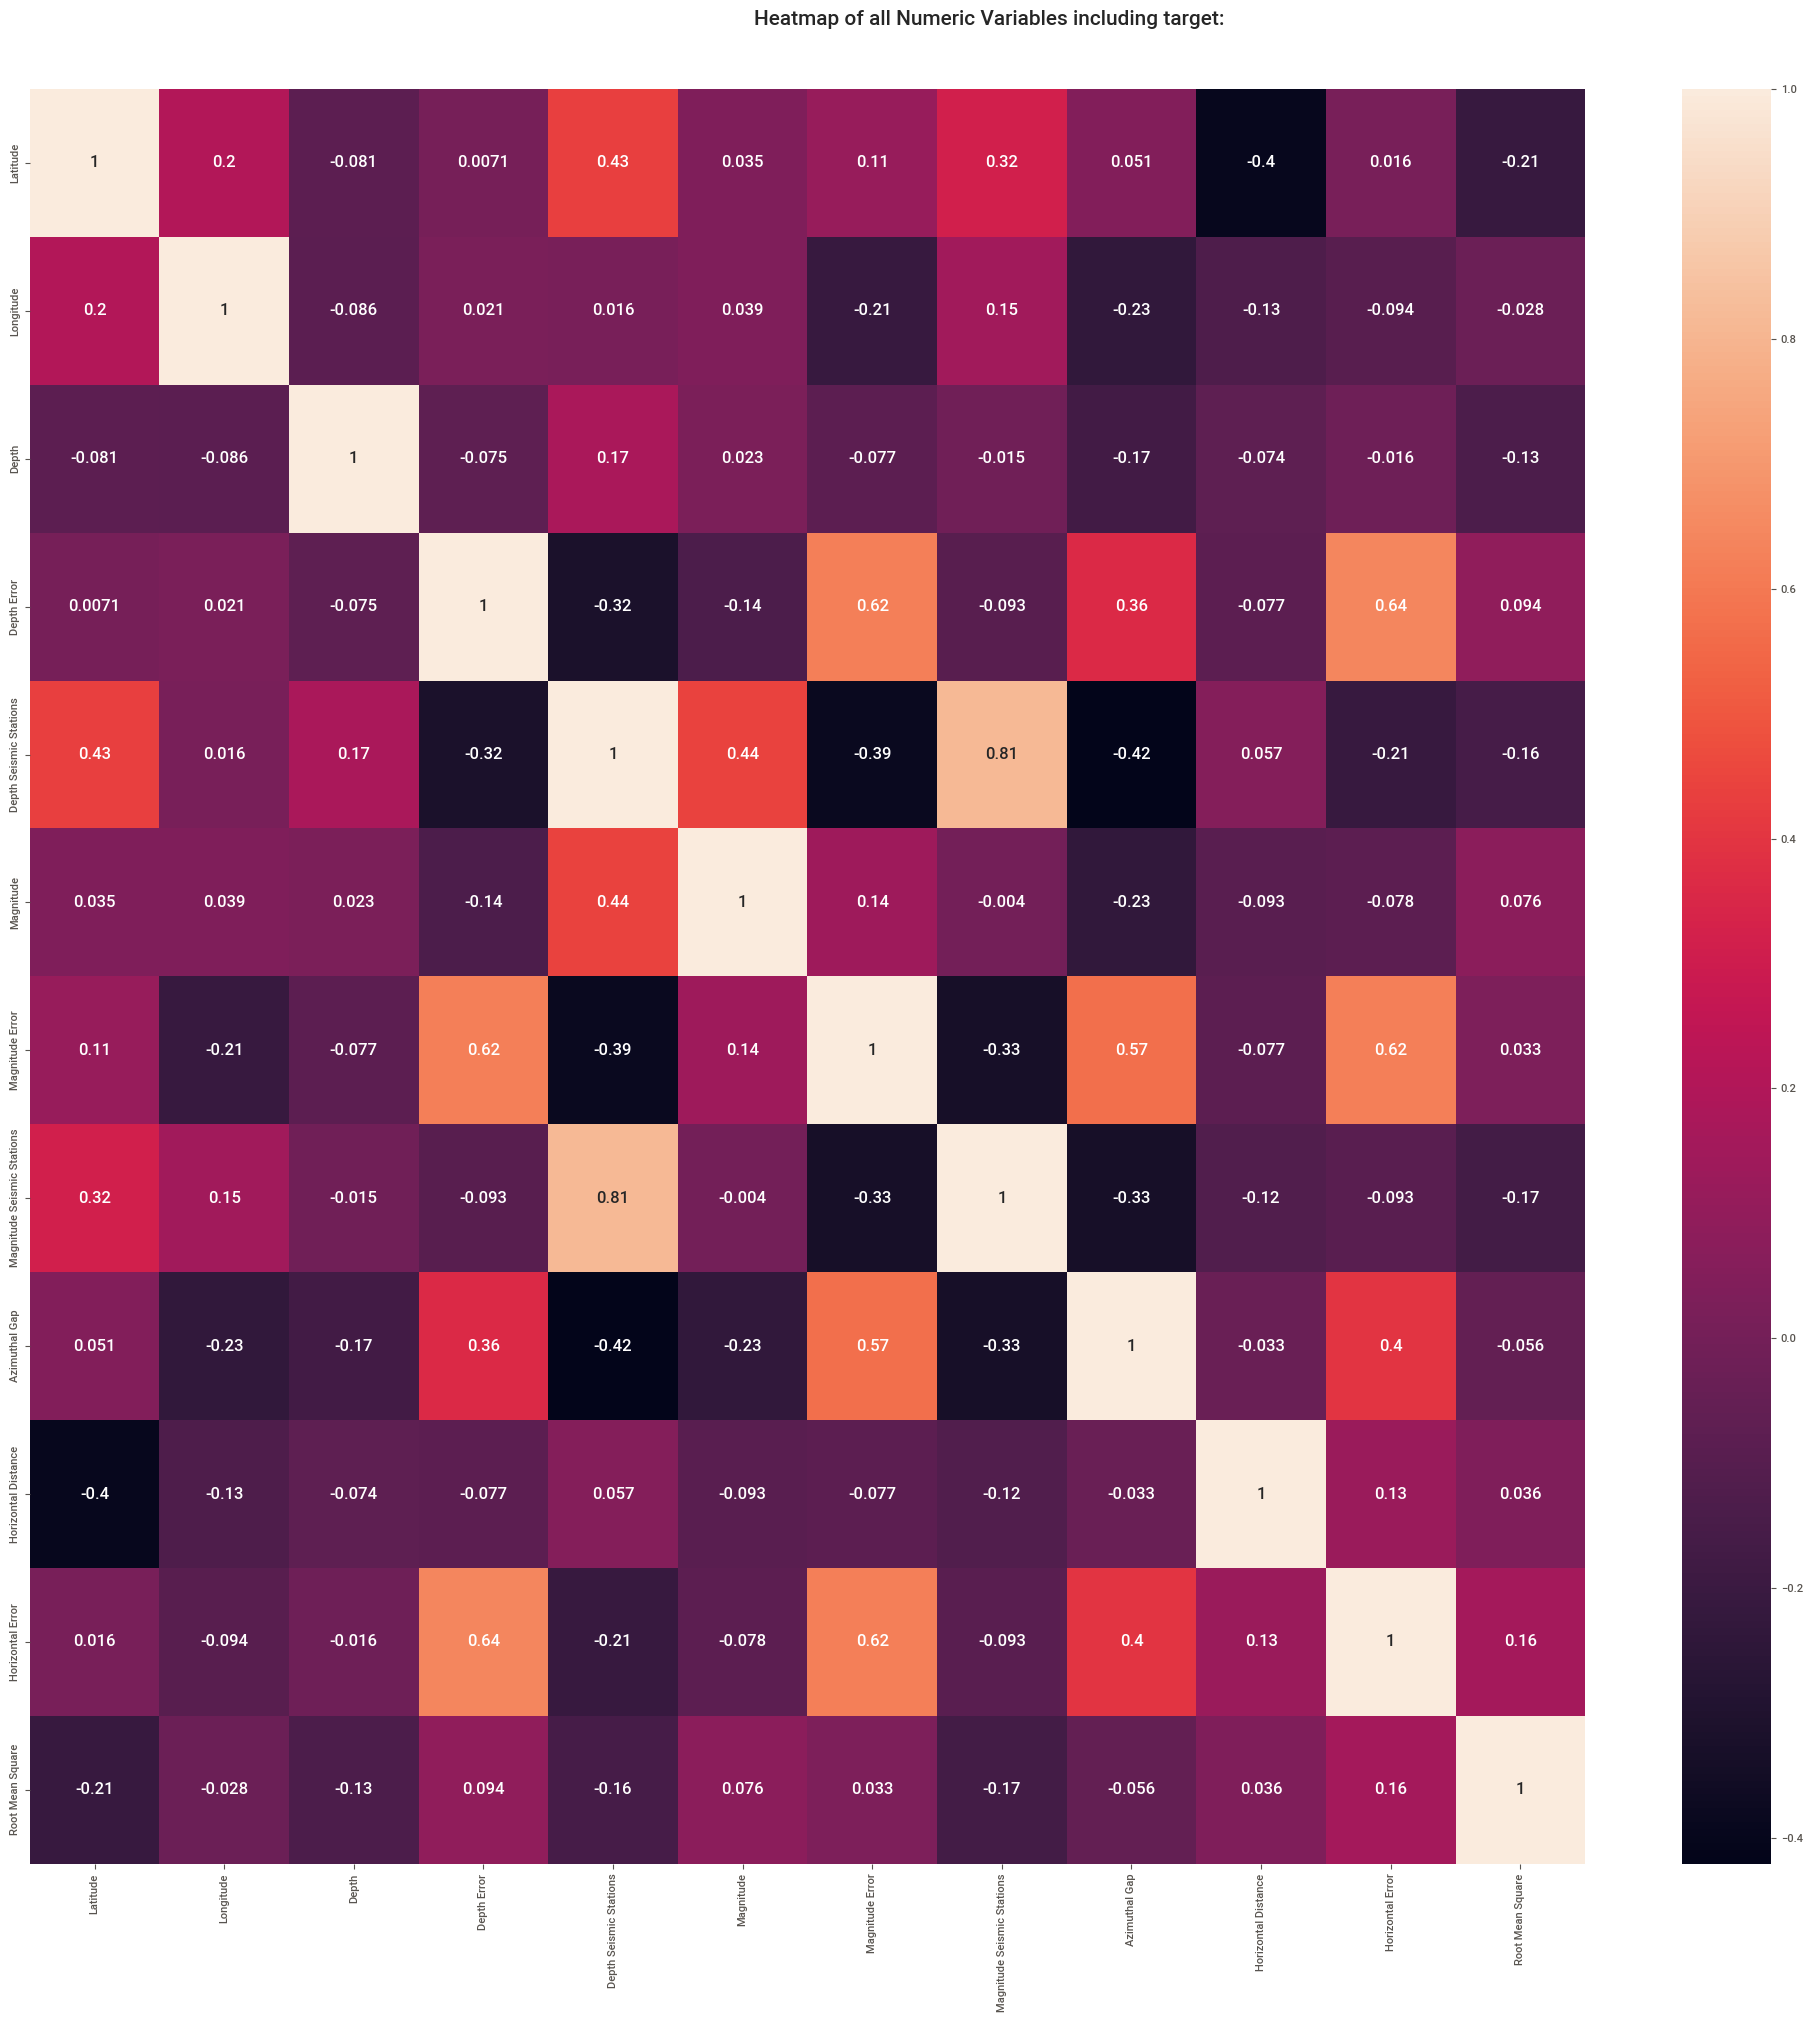

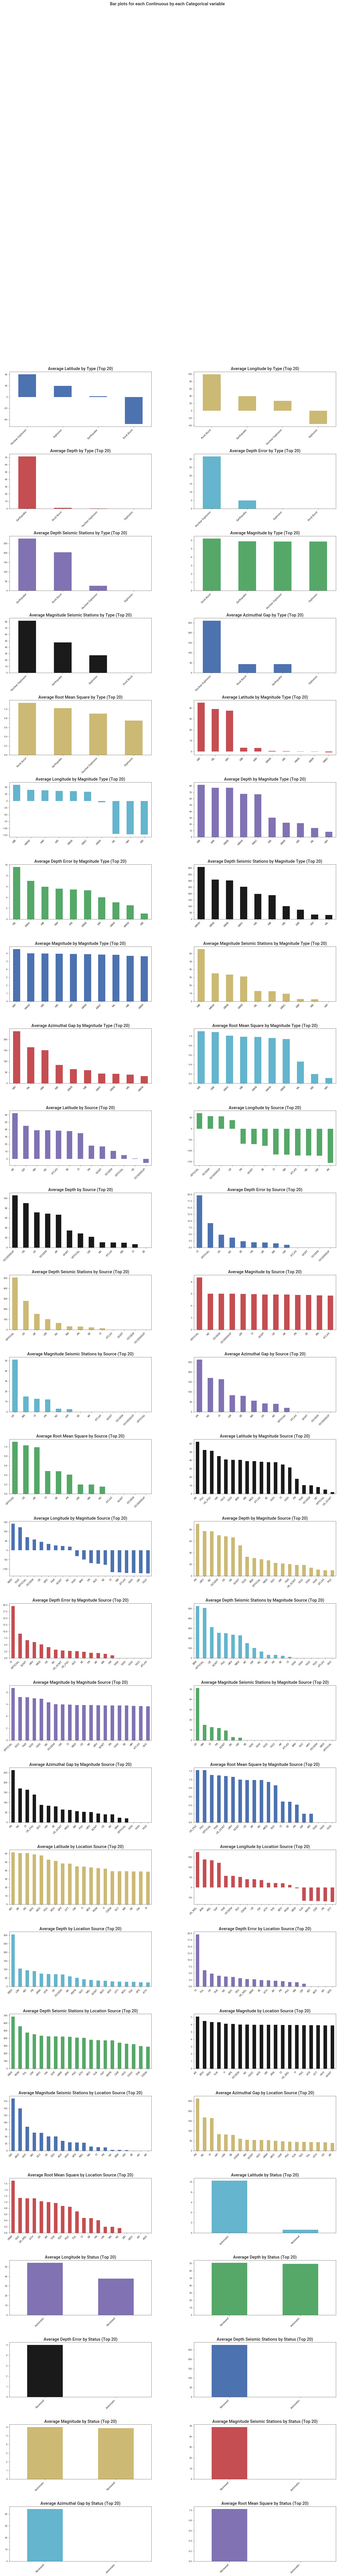

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/sahilsingh/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/sahilsingh/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/sahilsingh/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/sahilsingh/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/sahilsingh/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/sahilsingh/nltk_data...
[nltk_data]    |   Package 

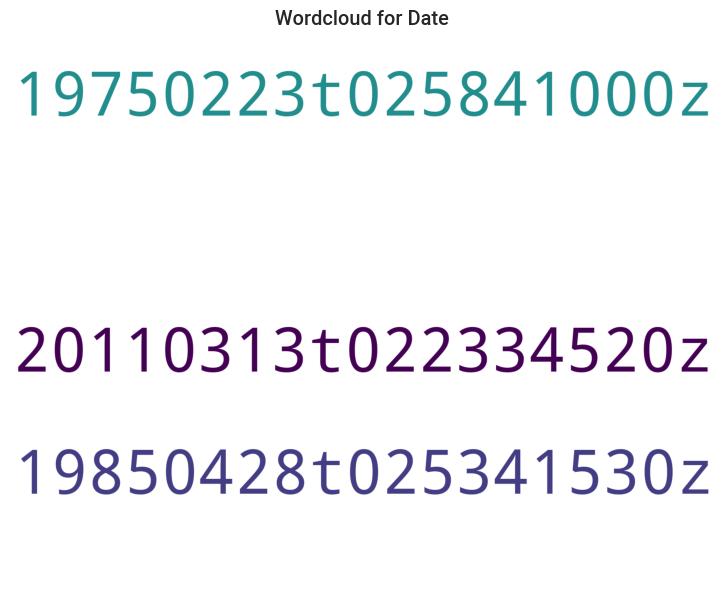

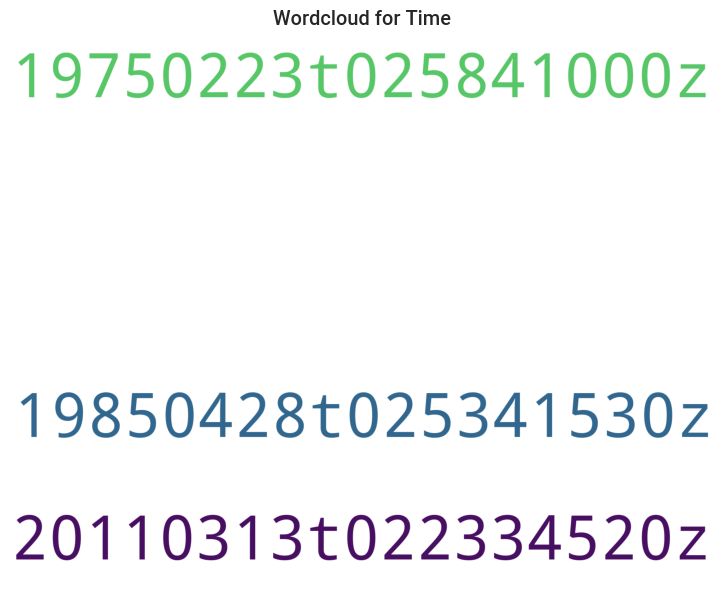

All Plots done
Time to run AutoViz = 21 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [341]:
import matplotlib.pyplot as plt
%matplotlib inline
filename='database.csv'
sep=','
dft=AV.AutoViz(filename)

In [342]:
import sweetviz as sv
my_report = sv.analyze(data_earthquake)
my_report.show_html() 

                                             |          | [  0%]   00:00 -> (? left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [343]:
import pandas as pd
import dtale
dtale.show(data_earthquake)




Main Characteristics of Earthquake Data:
Extract the main characteristics of the earthquake data, including date, time, latitude, longitude, depth, and magnitude.




In [344]:
data_earthquake.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

Scaling Data:
Scale the data, particularly the date and time, by converting them to Unix time (seconds since the Unix epoch) to prepare them for model input.



In [345]:
import datetime
import time

timestamp = []
for d, t in zip(data_earthquake['Date'], data_earthquake['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')

In [346]:
timeStamp = pd.Series(timestamp)
data_earthquake['Timestamp'] = timeStamp.values

In [347]:
data_earthquake.Timestamp

0        -157650342.0
1        -157485611.0
2        -157375442.0
3        -157113617.0
4        -157046230.0
             ...     
23407    1482893532.0
23408    1482896627.0
23409    1482908931.0
23410    1483030819.0
23411    1483108708.0
Name: Timestamp, Length: 23412, dtype: object

In [348]:
data_earthquake.Timestamp.value_counts()

Timestamp
ValueError      3
1072100756.0    2
867665859.0     2
554754418.0     2
930946434.0     2
               ..
504225801.0     1
504225581.0     1
504189909.0     1
504143163.0     1
1483108708.0    1
Name: count, Length: 23391, dtype: int64

In [349]:
data_earthquake

Date       Time    Latitude  Longitude     Type      Depth  \
0      01/02/1965  13:44:18   19.2460  145.6160   Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630  127.3520   Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790 -173.9720   Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760  -23.5570   Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380  126.4270   Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917 -118.8941   Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777 -118.8957   Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179  140.4262   Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283  118.6639   Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973  141.4103   Earthquake   11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  \
0          NaN                NaN              6.0           MW        
1          NaN                NaN              5.8           MW        
2          NaN                NaN              6.2           MW        
3          NaN                NaN              5.8           MW        
4          NaN                NaN              5.8           MW        
...            ...                     ...        ...            ...   
23407      1.2               40.0              5.6           ML        
23408      2.0               33.0              5.5           ML        
23409      1.8                NaN              5.9          MWW        
23410      1.8                NaN              6.3          MWW        
23411      2.2                NaN              5.5           MB        

       Magnitude Error  Magnitude Seismic Stations  Azimuthal Gap  \
0             NaN                    NaN                  NaN       
1             NaN                    NaN                  NaN       
2             NaN                    NaN                  NaN       
3             NaN                    NaN                  NaN       
4             NaN                    NaN                  NaN       
...                ...                         ...            ...   
23407       0.320                   18.0                42.47       
23408       0.260                   18.0                48.58       
23409         NaN                    NaN                91.00       
23410         NaN                    NaN                26.00       
23411       0.029                  428.0                97.00       

       Horizontal Distance  Horizontal Error  Root Mean Square       ID       \
0               NaN                NaN                NaN       ISCGEM860706   
1               NaN                NaN                NaN       ISCGEM860737   
2               NaN                NaN                NaN       ISCGEM860762   
3               NaN                NaN                NaN       ISCGEM860856   
4               NaN                NaN                NaN       ISCGEM860890   
...                    ...               ...               ...           ...   
23407         0.120                NaN             0.1898         NN00570710   
23408         0.129                NaN             0.2187         NN00570744   
23409         0.992                4.8             1.5200         US10007NAF   
23410         3.553                6.0             1.4300         US10007NL0   
23411         0.681                4.5             0.9100         US10007NTD   

       Source Location Source Magnitude Source   Status     Timestamp    
0      ISCGEM      ISCGEM          ISCGEM       Automatic  -157650342.0  
1      ISCGEM      ISCGEM          ISCGEM       Automatic  -157485611.0  
2      ISCGEM      ISCGEM          ISCGEM       Automatic  -157375442.0  
3      ISCGEM      ISCGEM          ISCGEM       Automatic  -157113617.0  
4      ISCGEM      ISCGEM          ISCGEM       Automatic  -157046230.0  
...       ...             ...              ...

In [350]:
data_earthquake = data_earthquake.drop(['Date', 'Time'], axis=1)
data_earthquake = data_earthquake[data_earthquake.Timestamp != 'ValueError']
data_earthquake.head()

Latitude  Longitude     Type     Depth  Depth Error  \
0   19.246    145.616   Earthquake  131.6     NaN        
1    1.863    127.352   Earthquake   80.0     NaN        
2  -20.579   -173.972   Earthquake   20.0     NaN        
3  -59.076    -23.557   Earthquake   15.0     NaN        
4   11.938    126.427   Earthquake   15.0     NaN        

   Depth Seismic Stations  Magnitude Magnitude Type  Magnitude Error  \
0           NaN               6.0          MW             NaN          
1           NaN               5.8          MW             NaN          
2           NaN               6.2          MW             NaN          
3           NaN               5.8          MW             NaN          
4           NaN               5.8          MW             NaN          

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0             NaN                  NaN               NaN            
1             NaN                  NaN               NaN            
2             NaN                  NaN               NaN            
3             NaN                  NaN               NaN            
4             NaN                  NaN               NaN            

   Horizontal Error  Root Mean Square       ID       Source Location Source  \
0        NaN               NaN         ISCGEM860706  ISCGEM      ISCGEM       
1        NaN               NaN         ISCGEM860737  ISCGEM      ISCGEM       
2        NaN               NaN         ISCGEM860762  ISCGEM      ISCGEM       
3        NaN               NaN         ISCGEM860856  ISCGEM      ISCGEM       
4        NaN               NaN         ISCGEM860890  ISCGEM      ISCGEM       

  Magnitude Source   Status    Timestamp    
0      ISCGEM       Automatic -157650342.0  
1      ISCGEM       Automatic -157485611.0  
2      ISCGEM       Automatic -157375442.0  
3      ISCGEM       Automatic -157113617.0  
4      ISCGEM       Automatic -157046230.0

In [351]:
data_earthquake.value_counts

<bound method DataFrame.value_counts of        Latitude  Longitude     Type      Depth  Depth Error  \
0       19.2460  145.6160   Earthquake  131.60      NaN       
1        1.8630  127.3520   Earthquake   80.00      NaN       
2      -20.5790 -173.9720   Earthquake   20.00      NaN       
3      -59.0760  -23.5570   Earthquake   15.00      NaN       
4       11.9380  126.4270   Earthquake   15.00      NaN       
...         ...        ...         ...     ...          ...   
23407   38.3917 -118.8941   Earthquake   12.30      1.2       
23408   38.3777 -118.8957   Earthquake    8.80      2.0       
23409   36.9179  140.4262   Earthquake   10.00      1.8       
23410   -9.0283  118.6639   Earthquake   79.00      1.8       
23411   37.3973  141.4103   Earthquake   11.94      2.2       

       Depth Seismic Stations  Magnitude Magnitude Type  Magnitude Error  \
0                NaN              6.0           MW              NaN        
1                NaN              5.8           MW 

In [352]:
data_earthquake.isna().sum()

Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18949
Depth Seismic Stations        16313
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23082
Magnitude Seismic Stations    20845
Azimuthal Gap                 16111
Horizontal Distance           21805
Horizontal Error              22253
Root Mean Square               6059
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
Timestamp                         0
dtype: int64

In [353]:
columns_to_remove = ['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square']

data_earthquake = data_earthquake.drop(columns=columns_to_remove)

print(data_earthquake)

       Latitude  Longitude     Type      Depth  Magnitude Magnitude Type  \
0       19.2460  145.6160   Earthquake  131.60     6.0           MW        
1        1.8630  127.3520   Earthquake   80.00     5.8           MW        
2      -20.5790 -173.9720   Earthquake   20.00     6.2           MW        
3      -59.0760  -23.5570   Earthquake   15.00     5.8           MW        
4       11.9380  126.4270   Earthquake   15.00     5.8           MW        
...         ...        ...         ...     ...        ...            ...   
23407   38.3917 -118.8941   Earthquake   12.30     5.6           ML        
23408   38.3777 -118.8957   Earthquake    8.80     5.5           ML        
23409   36.9179  140.4262   Earthquake   10.00     5.9          MWW        
23410   -9.0283  118.6639   Earthquake   79.00     6.3          MWW        
23411   37.3973  141.4103   Earthquake   11.94     5.5           MB        

            ID       Source Location Source Magnitude Source   Status    \
0      ISCGE

In [354]:
data_earthquake=data_earthquake.fillna('MW')

Data Visualization:
Visualize the earthquake data on a world map to depict the frequency and distribution of earthquakes based on latitude, longitude, and magnitude.




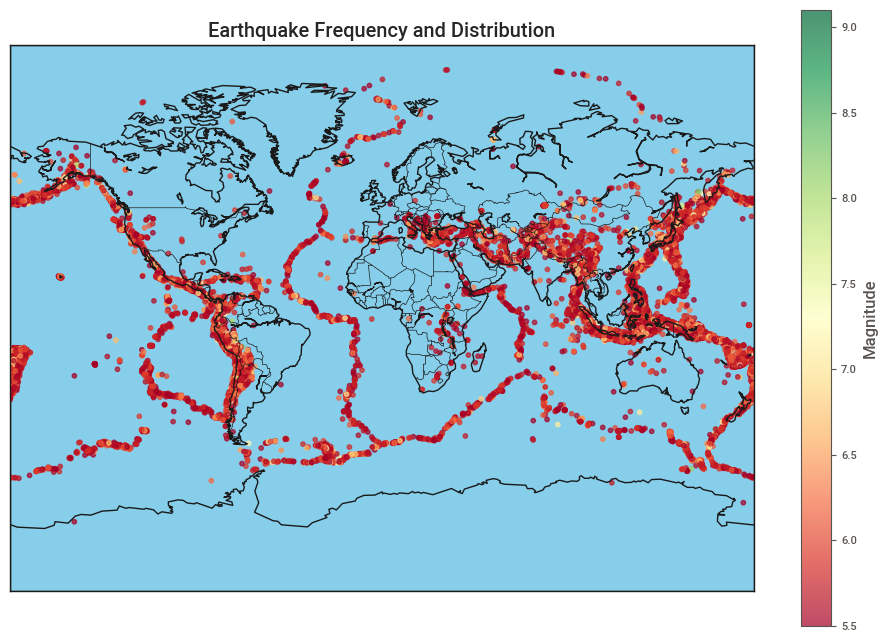

In [355]:
latitudes = data_earthquake['Latitude'].values
longitudes = data_earthquake['Longitude'].values
magnitudes = data_earthquake['Magnitude'].values
plt.figure(figsize=(12, 8))
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='skyblue')
x, y = m(longitudes, latitudes)
m.scatter(x, y, c=magnitudes, cmap='RdYlGn', s=10, alpha=0.7)
plt.colorbar(label='Magnitude')
plt.title('Earthquake Frequency and Distribution')
plt.show()

Splitting the Dataset:
Divide the data into input features (X) and target variables (y) for model training and testing. Use a train-test split with a validation set, typically 80% training and 20% testing data.


In [356]:
data_earthquake.shape

(23409, 12)

In [357]:
data_earthquake['Status'] = data_earthquake['Status'].apply(lambda x: 1 if x == 'Reviewed' else 0)

In [358]:
data_earthquake['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [359]:
type_dummies = pd.get_dummies(data_earthquake['Type'], prefix='Type', drop_first=True)
data_earthquake = pd.concat([data_earthquake, type_dummies], axis=1)
data_earthquake.drop('Type', axis=1, inplace=True)

In [360]:
data_earthquake

Latitude  Longitude   Depth  Magnitude Magnitude Type       ID       \
0       19.2460  145.6160   131.60     6.0           MW       ISCGEM860706   
1        1.8630  127.3520    80.00     5.8           MW       ISCGEM860737   
2      -20.5790 -173.9720    20.00     6.2           MW       ISCGEM860762   
3      -59.0760  -23.5570    15.00     5.8           MW       ISCGEM860856   
4       11.9380  126.4270    15.00     5.8           MW       ISCGEM860890   
...         ...        ...     ...        ...            ...           ...   
23407   38.3917 -118.8941    12.30     5.6           ML         NN00570710   
23408   38.3777 -118.8957     8.80     5.5           ML         NN00570744   
23409   36.9179  140.4262    10.00     5.9          MWW         US10007NAF   
23410   -9.0283  118.6639    79.00     6.3          MWW         US10007NL0   
23411   37.3973  141.4103    11.94     5.5           MB         US10007NTD   

       Source Location Source Magnitude Source  Status    Timestamp   \
0      ISCGEM      ISCGEM          ISCGEM          0   -1.576503e+08   
1      ISCGEM      ISCGEM          ISCGEM          0   -1.574856e+08   
2      ISCGEM      ISCGEM          ISCGEM          0   -1.573754e+08   
3      ISCGEM      ISCGEM          ISCGEM          0   -1.571136e+08   
4      ISCGEM      ISCGEM          ISCGEM          0   -1.570462e+08   
...       ...             ...              ...     ...           ...   
23407      NN          NN              NN          1    1.482894e+09   
23408      NN          NN              NN          1    1.482897e+09   
23409      US          US              US          1    1.482909e+09   
23410      US          US              US          1    1.483031e+09   
23411      US          US              US          1    1.483109e+09   

       Type_Explosion  Type_Nuclear Explosion  Type_Rock Burst  
0           False               False               False       
1           False               False               False       
2           False               False               False       
3           False               False               False       
4           False               False               False       
...               ...                     ...              ...  
23407       False               False               False       
23408       False               False               False       
23409       False               False               False       
23410       False               False               False       
23411       False               False               False       

[23409 rows x 14 columns]

In [361]:
data_earthquake.columns

Index(['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Magnitude Type', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status', 'Timestamp',
       'Type_Explosion', 'Type_Nuclear Explosion', 'Type_Rock Burst'],
      dtype='object')

In [362]:
dummy_columns = ['Magnitude Type', 'Source', 'Location Source']
dummy_variables = pd.get_dummies(data_earthquake[dummy_columns], drop_first=True)
data_earthquake = pd.concat([data_earthquake, dummy_variables], axis=1)
data_earthquake.drop(dummy_columns, axis=1, inplace=True)


In [363]:
dummy_columns = ['Magnitude Source']
dummy_variables = pd.get_dummies(data_earthquake[dummy_columns], drop_first=True)
data_earthquake = pd.concat([data_earthquake, dummy_variables], axis=1)
data_earthquake.drop(dummy_columns, axis=1, inplace=True)

In [364]:
data_earthquake

Latitude  Longitude   Depth  Magnitude       ID       Status  \
0       19.2460  145.6160   131.60     6.0     ISCGEM860706     0     
1        1.8630  127.3520    80.00     5.8     ISCGEM860737     0     
2      -20.5790 -173.9720    20.00     6.2     ISCGEM860762     0     
3      -59.0760  -23.5570    15.00     5.8     ISCGEM860856     0     
4       11.9380  126.4270    15.00     5.8     ISCGEM860890     0     
...         ...        ...     ...        ...           ...     ...   
23407   38.3917 -118.8941    12.30     5.6       NN00570710     1     
23408   38.3777 -118.8957     8.80     5.5       NN00570744     1     
23409   36.9179  140.4262    10.00     5.9       US10007NAF     1     
23410   -9.0283  118.6639    79.00     6.3       US10007NL0     1     
23411   37.3973  141.4103    11.94     5.5       US10007NTD     1     

         Timestamp   Type_Explosion  Type_Nuclear Explosion  Type_Rock Burst  \
0     -1.576503e+08       False               False               False        
1     -1.574856e+08       False               False               False        
2     -1.573754e+08       False               False               False        
3     -1.571136e+08       False               False               False        
4     -1.570462e+08       False               False               False        
...             ...             ...                     ...              ...   
23407  1.482894e+09       False               False               False        
23408  1.482897e+09       False               False               False        
23409  1.482909e+09       False               False               False        
23410  1.483031e+09       False               False               False        
23411  1.483109e+09       False               False               False        

       Magnitude Type_MD  Magnitude Type_MH  Magnitude Type_ML  \
0            False              False              False         
1            False              False              False         
2            False              False              False         
3            False              False              False         
4            False              False              False         
...                  ...                ...                ...   
23407        False              False               True         
23408        False              False               True         
23409        False              False              False         
23410        False              False              False         
23411        False              False              False         

       Magnitude Type_MS  Magnitude Type_MW  Magnitude Type_MWB  \
0            False               True               False         
1            False               True               False         
2            False               True               False         
3            False               True               False         
4            False               True               False         
...                  ...                ...                 ...   
23407        False              False               False         
23408        False              False               False         
23409        False              False               False         
23410        False              False               False         
23411        False              False               False         

       Magnitude Type_MWC  Magnitude Type_MWR  Magnitude Type_MWW  \
0             False               False               False         
1             False               False               False         
2             False               False               False         
3             False               False               False         
4             False               False               False         
...                   ...                 ...                 ...   
23407         False               False               False         
23408         False               False    

In [365]:
data_earthquake.drop('ID', axis=1, inplace=True)


In [366]:
data_earthquake

Latitude  Longitude   Depth  Magnitude  Status    Timestamp   \
0       19.2460  145.6160   131.60     6.0        0   -1.576503e+08   
1        1.8630  127.3520    80.00     5.8        0   -1.574856e+08   
2      -20.5790 -173.9720    20.00     6.2        0   -1.573754e+08   
3      -59.0760  -23.5570    15.00     5.8        0   -1.571136e+08   
4       11.9380  126.4270    15.00     5.8        0   -1.570462e+08   
...         ...        ...     ...        ...     ...           ...   
23407   38.3917 -118.8941    12.30     5.6        1    1.482894e+09   
23408   38.3777 -118.8957     8.80     5.5        1    1.482897e+09   
23409   36.9179  140.4262    10.00     5.9        1    1.482909e+09   
23410   -9.0283  118.6639    79.00     6.3        1    1.483031e+09   
23411   37.3973  141.4103    11.94     5.5        1    1.483109e+09   

       Type_Explosion  Type_Nuclear Explosion  Type_Rock Burst  \
0           False               False               False        
1           False               False               False        
2           False               False               False        
3           False               False               False        
4           False               False               False        
...               ...                     ...              ...   
23407       False               False               False        
23408       False               False               False        
23409       False               False               False        
23410       False               False               False        
23411       False               False               False        

       Magnitude Type_MD  Magnitude Type_MH  Magnitude Type_ML  \
0            False              False              False         
1            False              False              False         
2            False              False              False         
3            False              False              False         
4            False              False              False         
...                  ...                ...                ...   
23407        False              False               True         
23408        False              False               True         
23409        False              False              False         
23410        False              False              False         
23411        False              False              False         

       Magnitude Type_MS  Magnitude Type_MW  Magnitude Type_MWB  \
0            False               True               False         
1            False               True               False         
2            False               True               False         
3            False               True               False         
4            False               True               False         
...                  ...                ...                 ...   
23407        False              False               False         
23408        False              False               False         
23409        False              False               False         
23410        False              False               False         
23411        False              False               False         

       Magnitude Type_MWC  Magnitude Type_MWR  Magnitude Type_MWW  \
0             False               False               False         
1             False               False               False         
2             False               False               False         
3             False               False               False         
4             False               False               False         
...                   ...                 ...                 ...   
23407         False               False               False         
23408         False               False               False         
23409         False               False                True         
23410         False               False                True         
2341

In [367]:
y = data_earthquake['Status']
X = data_earthquake.drop('Status', axis=1)

In [368]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [370]:
import numpy as np


In [371]:
X.shape

(23409, 99)

Neural Network Model:
Create a neural network model using Keras with specified layers, nodes, and activation functions to predict earthquake magnitude and depth based on input features.

Hyperparameter Tuning:
Define hyperparameters with multiple options (e.g., batch size, epochs, optimizer) to find the best-fit model configuration using techniques like grid search or random search.



In [372]:
inputs = tf.keras.Input(shape=(99,))
x = tf.keras.layers.Dense(55, activation='relu')(inputs)
x = tf.keras.layers.Dense(45, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)


batch_size = 32
epochs = 30

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)



Finding the Best Fit Model:
Use hyperparameter tuning techniques to find the best-fit model configuration that maximizes performance metrics such as accuracy or mean squared error.

Evaluation on Test Data:
Evaluate the best-fit model on the test data to assess its predictive capabilities. Measure metrics such as loss (e.g., mean squared error) and accuracy to determine the model's effectiveness in earthquake prediction.


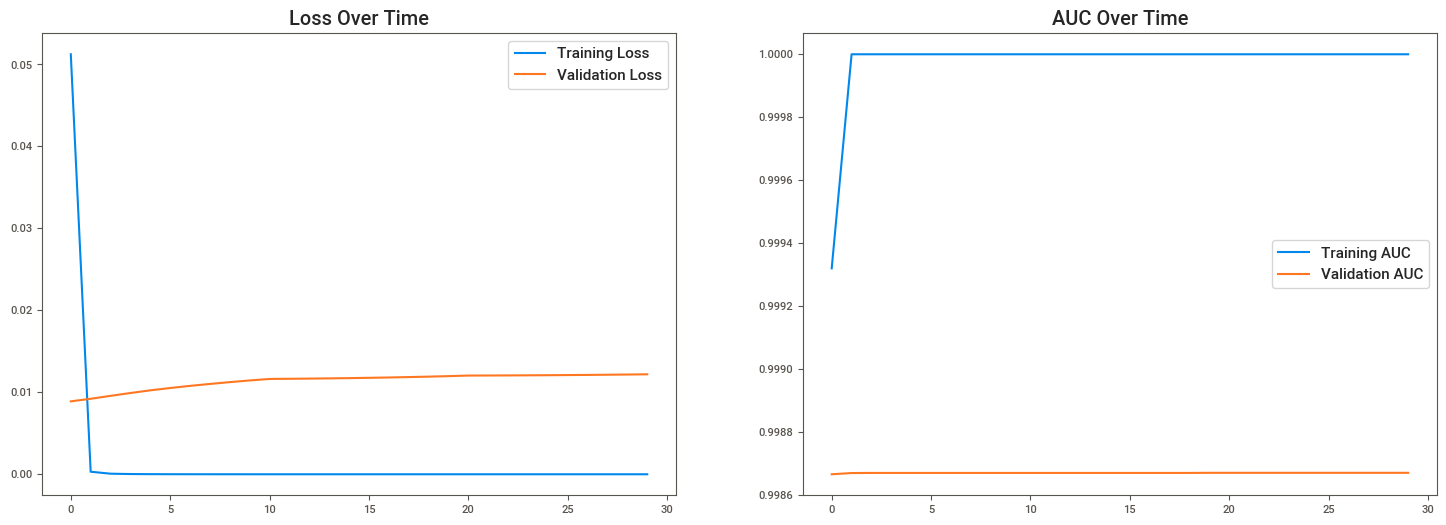

In [373]:
plt.figure(figsize=(18, 6))

epochs_range = range(epochs)
train_loss, val_loss = history.history['loss'], history.history['val_loss']
train_auc, val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend()
plt.title("Loss Over Time")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_auc, label="Training AUC")
plt.plot(epochs_range, val_auc, label="Validation AUC")
plt.legend()
plt.title("AUC Over Time")
plt.show()


In [374]:
model.evaluate(X_test, y_test)

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - auc: 0.9999 - loss: 8.2926e-04


[0.0024657128378748894, 0.999880313873291]

In [389]:
y_pred1=model.predict(X_test)

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step


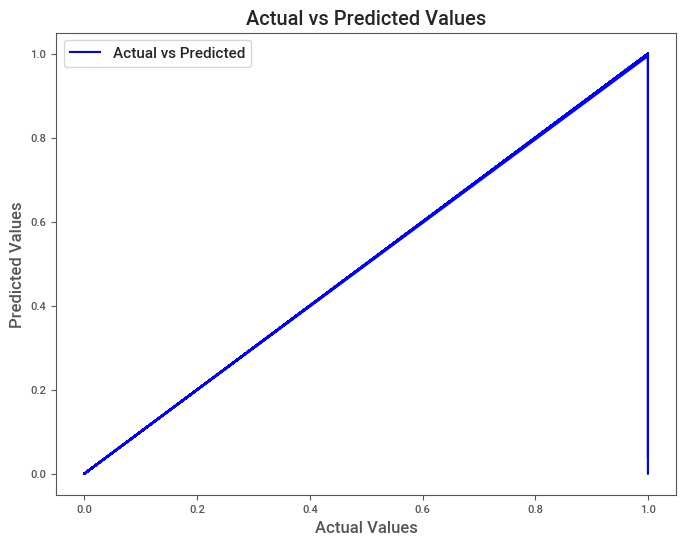

In [390]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(y_test, y_pred1, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [391]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
r_squared = 1 - mean_squared_error(y_test, y_pred) / np.var(y_test)
print("R-squared:", r_squared)

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
R-squared: 0.9957068713367915


In [392]:

from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
print("RF trained.")

RF trained.


In [393]:
model1.score(X_test, y_test)

1.0

In [394]:
y_pred = model1.predict(X_test)
r_squared = 1 - mean_squared_error(y_test, y_pred) / np.var(y_test)
print("R-squared:", r_squared)

R-squared: 1.0


In [395]:
from sklearn.svm import SVC

In [396]:
SVC=SVC()

In [397]:
SVC.fit(X_train,y_train)

SVC()

In [398]:
y_pred2 = SVC.predict(X_test)
r_squared = 1 - mean_squared_error(y_test, y_pred) / np.var(y_test)
print("R-squared:", r_squared)

R-squared: 1.0


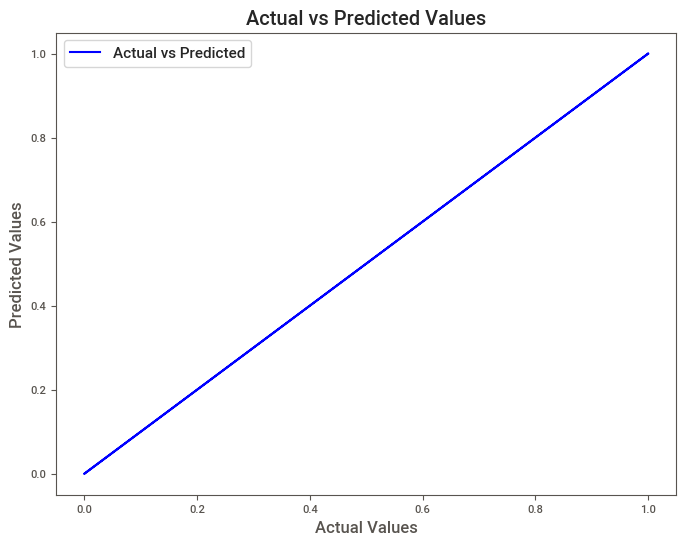

In [399]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


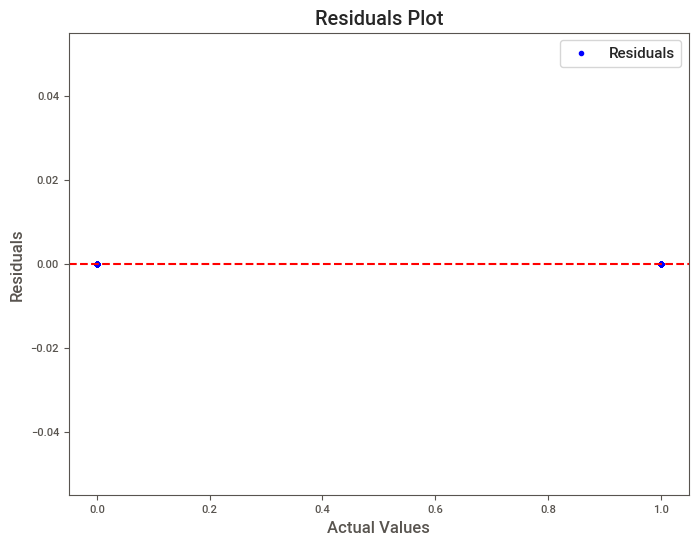

2024-04-06 21:51:35,915 - INFO     - Executing shutdown due to inactivity...


In [400]:

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()
